<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title>Programming Exercise 1</title>
<style>
  body {
    font-family: Arial, Helvetica, sans-serif;
    margin: 40px;
    background-color: #f9f9f9;
    color: #333;
  }

  .header {
    display: flex;
    justify-content: space-between;
    align-items: flex-start;
    border-bottom: 2px solid #007acc;
    padding-bottom: 10px;
    margin-bottom: 30px;
  }

  .title h1 {
    margin: 0;
    font-size: 2em;
    color: #007acc;
  }

  .authors {
    text-align: right;
    font-size: 0.95em;
    line-height: 1.6;
  }

  .authors strong {
    display: block;
    margin-bottom: 5px;
    font-size: 1.05em;
  }
</style>
</head>
<body>
<header class="header">
  <div class="title">
    <h1>Programming Exercise 1</h1>
  </div>
  <div class="authors">
    <strong>Group 04</strong>
    <br>Brian Huynh (476188)<br>
    Paula Winter (409827)<br>
    Paul Budden (484284)<br>
    Anar Alizade (477200)
  </div>
</header>

</body>
</html>


## Table of Contents

**I. [Coding Workflow](#I)**  
&nbsp;&nbsp;&nbsp;&nbsp;**I.1 [Import Built-in Libraries](#I.1)**  
&nbsp;&nbsp;&nbsp;&nbsp;**I.2 [Basis Functions](#I.2)**  
&nbsp;&nbsp;&nbsp;&nbsp;**I.3 [FEM Frameworks](#I.3)**  
&nbsp;&nbsp;&nbsp;&nbsp;**I.4 [Helper Functions for Plotting Results](#I.4)**  

**II. [Tasks](#II)**  
&nbsp;&nbsp;&nbsp;&nbsp;**II.1 [Task 1](#II.1)**  
&nbsp;&nbsp;&nbsp;&nbsp;**II.2 [Task 2](#II.2)**  
&nbsp;&nbsp;&nbsp;&nbsp;**II.3 [Task 3](#II.3)**  
&nbsp;&nbsp;&nbsp;&nbsp;**II.4 [Bonus Task 1](#II.4)**  
&nbsp;&nbsp;&nbsp;&nbsp;**II.5 [Bonus Task 2](#II.5)**



The following order of completion needs to be completed:
1. code the functions 'grid'(linear case), 'assembleMatrix'(linear case), 'rhsConstant'(linear case), 'FEM1DConstant'(linear case) -> complete Test case 0
2. code the functions 'solConstant', 'interpolate'(linear case), 'L2Error'(linear case) -> complete Test case 1
3. code the functions 'rhsDelta'(linear case), 'FEM1DDelta'(linear case), 'solDelta' -> complete Test case 2
4. complete the functions 'grid'(quadratic case), 'assembleMatrix'(quadratic case), 'rhsConstant'(quadratic case), 'interpolate'(quadratic case), 'L2Error'(quadratic case) -> complete Test case 3
5. complete the functions 'rhsDelta'(quadratic case) -> complete Test case 4 and Error Comparison

I. Coding Workflow <a name="I"></a>
=================

I.1 Import Built-in Libraries <a name="I.1"></a>
--------------------------------

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.sparse import spdiags, csc_matrix
from scipy.sparse.linalg import spsolve
%matplotlib inline

### Importing Libraries

1. **NumPy (`numpy`)**  
   Import the NumPy library, a fundamental package for numerical computing in Python. It provides arrays, matrices, and a wide range of mathematical functions for fast numerical operations.  

2. **`quad` from SciPy (`scipy.integrate`)**  
   Used for numerical integration, i.e., calculating the area under a curve. This is helpful for tasks such as computing definite integrals in your code.  

3. **Matplotlib's `pyplot` (`matplotlib.pyplot`)**  
   Provides tools for creating plots and visualizations. We typically import it as `plt` and use it to generate line plots, scatter plots, bar charts, etc.  

4. **Sparse Matrices (`scipy.sparse`)**  
   - **`spdiags`**: Creates a sparse matrix from diagonals, which is memory-efficient when working with large matrices containing mostly zeros.  
   - **`csc_matrix`**: Converts a matrix into Compressed Sparse Column (CSC) format, optimized for fast arithmetic and matrix operations on sparse data.  

5. **Solving Sparse Linear Systems (`scipy.sparse.linalg`)**  
   - **`spsolve`**: Solves linear systems of the form `Ax = b` where `A` is a sparse matrix. This is much faster than standard dense solvers for large, mostly-zero matrices.  

6. **`%matplotlib inline`** (Jupyter magic command)  
   Ensures that all plots created with Matplotlib are displayed directly within the notebook cells.


I.2 Basic Functions <a name="I.2"></a>
--------------------------------

Linear basis functions are defined using two nodes per element.
$$
\phi_i(x) = 
\begin{cases}
 \frac{x-x_{i-1}}{x_{i}-x_{i-1}} & \text{for } x \in (x_{i-1}, x_{i}] \\
 \frac{x_{i+1}-x}{x_{i+1}-x_{i}} & \text{for } x \in (x_{i}, x_{i+1}] \\
 0 & \text{elsewhere}
\end{cases}
$$ 
In the following example, the green basis function correpsonds to $\phi_i(x)$ with $x_{i-1} = 0,\, x_i = 1,\, x_{i+1} = 2$. Notice that $\phi_i(x)$ 'overlaps' with $\phi_{i-1}(x)$ and $\phi_{i+1}(x)$.
The illustration shows two elements of the domain, the first element is defined for $ x \in (0, 1]$, the second element is defined for $ x \in (1, 2]$.

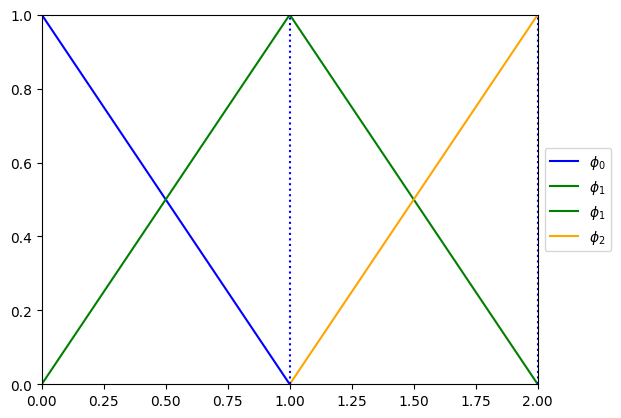

In [3]:
x1 = np.linspace(0, 1, 1000)
x2 = np.linspace(1, 2, 1000)
fig = plt.figure()

plt.plot(x1, 1 - x1, color='blue', label=r'$\phi_0$')
plt.plot(x1, x1, color='green', label=r'$\phi_1$')
plt.plot(x2, 2 - x2, color='green', label=r'$\phi_1$')
plt.plot(x2, x2 - 1, color='orange', label=r'$\phi_2$')

plt.axvline(x=1, color='blue', linestyle=':')
plt.axvline(x=2, color='blue', linestyle=':')

plt.margins(x=0)
plt.margins(y=0)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Program Structure

What we have implemented in the code:

- **`def grid(...)`** – Creates the computational grid or mesh used for numerical calculations.  
- **`def assembleMatrix(...)`** – Constructs the stiffness matrix, which represents the system’s coefficients in the finite element formulation.  
- **`def assembleRHS(...)`** – Builds the right-hand side (RHS) vector that incorporates source terms or boundary conditions.  
- **`def linEqsSolver(...)`** – Solves the resulting linear system of equations to obtain the numerical solution.


I.3 Main FEM Frameworks <a name="I.3"></a>
--------------------------------

In [ ]:
def grid(N, ansatz='linear'):
    # N: the number of elements
    # ansatz: linear(default) will generate 2 nodes per element
    # return: a vector containing the node coordinates
    
    
    def f(x):               #for non-uniform grid only
            return x**2
        
        
    if (ansatz=='linear'):
        #TODO
        #uniform grid
        node_count = N+1
        vec = np.linspace(0,1,node_count)
        
        #non-uniform grid
        vec = f(np.linspace(0, 1, node_count))
        
    else:
        #TODO
        #uniform grid
        node_count = 3*N-(N-1)
        vec = np.linspace(0,1,node_count)

        ##non-uniform grid
        vec = f(np.linspace(0, 1, node_count))



    return vec
#print(grid(5,ansatz='linear'))

The stiffness matrix can directly be computed via
$$
A_{ij} = \int_\Omega \phi'_i(x) \, \phi'_j(x) \, dx \quad
$$
where the basis functions shall be either linear or quadratic ansatz functions. \
Tips: 
- The integrals can be precomputed.
- In regions where the basis functions do not 'overlap', the integral is 0.
- The solution is known on the boundaries. You therefore only need to compute a solution for the unknown inner nodes of the domain. Choose the size of the stiffness matrix correspondingly.

In [ ]:
def assembleMatrix(lattice, ansatz='linear'):
    # lattice: node vector
    # return: stiffness matrix
    node_count = len(lattice)     #number of nodes

        
    #Matrix is NxN, 
    A = np.zeros([node_count,node_count])
    
    if (ansatz=='linear'):
        #TODO
        for i in range(0, node_count): #range(0 to node_count) because last element is not included
            for j in range(i-1, i+2): #,...i+2 because last element is not included
                if j==-1 or j==node_count: 
                    continue
                elif i==0:
                    A[i,j], err = quad(lambda x,i,j : grad_Phi(x,i,lattice)*grad_Phi(x,j,lattice), lattice[0],lattice[1], args=(i,j,))
                elif i==node_count-1:
                    A[i,j], err = quad(lambda x,i,j : grad_Phi(x,i,lattice)*grad_Phi(x,j,lattice), lattice[i-1],lattice[i], args=(i,j,))
                else:
                    A[i,j], err = quad(lambda x,i,j : grad_Phi(x,i,lattice)*grad_Phi(x,j,lattice), lattice[i-1],lattice[i+1], args=(i,j,))

    else:
        #if node_count%2==0:
            #print("only even values for N allowed")
        #TODO
        for i in range(1, node_count,2): #range(0 to node_count) because last element is not included
            for j in range(i-1, i+2): #,...i+2 because last element is not included
                #print(i,j)
                if j==-1 or j==node_count: 
                    continue
                elif i==0:
                    A[i,j], err = quad(lambda x,i,j : grad_Phi_quad(x,i,lattice)*grad_Phi_quad(x,j,lattice), lattice[i],lattice[i+1], args=(i,j,))
                elif i==node_count-1:
                    A[i,j], err = quad(lambda x,i,j : grad_Phi_quad(x,i,lattice)*grad_Phi_quad(x,j,lattice), lattice[i-1],lattice[i], args=(i,j,))
                else:
                    A[i,j], err = quad(lambda x,i,j : grad_Phi_quad(x,i,lattice)*grad_Phi_quad(x,j,lattice), lattice[i-1],lattice[i+1], args=(i,j,))
        
        for i in range(0, node_count,2): #range(0 to node_count) because last element is not included
            for j in range(i-2, i+3): #,...i+3 because last element is not included
                #print(i,j)
                if j<0 or j>node_count-1: 
                    continue
                elif i==0:
                    A[i,j], err = quad(lambda x,i,j : grad_Phi_quad(x,i,lattice)*grad_Phi_quad(x,j,lattice), lattice[i],lattice[i+2], args=(i,j,))
                elif i==node_count-1:
                    A[i,j], err = quad(lambda x,i,j : grad_Phi_quad(x,i,lattice)*grad_Phi_quad(x,j,lattice), lattice[i-2],lattice[i], args=(i,j,))
                else:
                    A[i,j], err = quad(lambda x,i,j : grad_Phi_quad(x,i,lattice)*grad_Phi_quad(x,j,lattice), lattice[i-2],lattice[i+2], args=(i,j,))
        

    return A

#node_vec = grid(3,ansatz='quad')
#print(node_vec)
#print(assembleMatrix(node_vec,ansatz="quad"))

The right hand side of the equation can be computed via
$$
b_i(x) = \int_\Omega f(x) \, \phi_i(x) dx 
$$

Tips:
- For a more general purpose FEM solver, you can also change the function definition to 'def rhs(function, lattice, ansatz='linear)'.
- Precomputation of the integral of the delta function is much easier (rhsDelta). The integration of the constant function (rhsConstant) can be numerically evaluated or also precomputed.
- Interation can be done via the 'quad(function, x_0, x_1)' function. Note that this function returns multiple values. The first entry contains the integration result (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html).
- The dimension of the stiffness matrix and the right hand side vector need to be the same.

In [ ]:
def rhsConstant(lattice, ansatz='linear'):
    # lattice: node values
    # return: vector of right hand side values
    
    f = 1
    node_count = len(lattice)
        
    b = np.zeros(node_count)
    #print(lattice)
    
    if (ansatz=='linear'):
        #TODO
        for i in range(0, node_count): #range(0 to node_count) because last element is not included
            
            #print("i = " + str(i))
                
            #print("int")
            if i==0:
                b[i], err = quad(lambda x,i : f*Phi(x,i,lattice), lattice[i],lattice[i+1], args=(i,))
            elif i==node_count-1:
                b[i], err = quad(lambda x,i : f*Phi(x,i,lattice), lattice[i-1],lattice[i], args=(i,))
            else:
                b[i], err = quad(lambda x,i : f*Phi(x,i,lattice), lattice[i-1],lattice[i+1], args=(i,))

                
    else:
        #TODO
        for i in range(1, node_count,2): #range(0 to node_count) because last element is not included
                b[i], err = quad(lambda x,i : f*Phi_quad(x,i,lattice), lattice[i-1],lattice[i+1], args=(i,))
        for i in range(0, node_count,2): #range(0 to node_count) because last element is not included
            if i==0:
                b[i], err = quad(lambda x,i : f*Phi_quad(x,i,lattice), lattice[i],lattice[i+2], args=(i,))
            elif i==node_count-1:
                b[i], err = quad(lambda x,i : f*Phi_quad(x,i,lattice), lattice[i-2],lattice[i], args=(i,))
            else:
                b[i], err = quad(lambda x,i : f*Phi_quad(x,i,lattice), lattice[i-2],lattice[i+2], args=(i,))
    return b
#node_vec = (grid(3,ansatz='quad'))
#print(node_vec)
#print(rhsConstant(node_vec,ansatz='quad'))

In [ ]:
def rhsDelta(lattice, ansatz='linear'):
    # lattice: node values
    # return: vector of right hand side values
    
    node_count = len(lattice)
    b = np.zeros(node_count)
        
    
    if (ansatz=='linear'):
        #TODO
        for i in range(0, node_count): #range(0 to node_count) because last element is not included
            b[i] = 2*Phi(1/2,i,lattice)
            
    else:
        #TODO
        for i in range(0, node_count): #range(0 to node_count) because last element is not included
            b[i] = 2*Phi_quad(1/2,i,lattice)
        
    return b
#print(rhsDelta(grid(5,ansatz='quad'),ansatz='quad'))

II. Tasks <a name="II"></a>
=================
II.1> Task 1 <a name="II.1"></a>